#Regression and Regularization

###Linear Regression

**Linear regression** is a supervised machine learning algorithm (although it can be applied in other ways as well) that is often used to model **continuous** data, rather than categorical (discrete) data, which we had been focusing on in the last two notebooks. In general, a **regression model** captures a functional relationship between input and response  variables (or between features and labels).

A **simple linear regression** captures a **linear** relationship between an input variable <code>x</code> and a response variable <code>y</code>

$$y = \alpha + \beta x + \varepsilon$$

where
<ul>
<li><i>alpha</i> is the **intercept** (where the line crosses the <code>y</code>-axis)</li>
<li><i>beta</i> is the **regression coefficient** (the model "parameter")</li>
<li><i>epsilon</i> is the **residual** (prediction error)</li>
</ul>


Linear regressions can be extended to encompass multiple input variables, which results in a **multiple linear regression**:

$$y = \alpha + \beta_1 x_1 + \beta_2 x_2 + ...+ \beta_n x_n + \varepsilon$$

To fit a linear regression to a data, we need to **minimize the sum of the squared residuals (OLS)**:
<img src="sum_residual_squares.png">
<img src="sum_residual_squares_formula.png">

As always, let's import the necessary packages and data.

In [1]:
%matplotlib inline

from __future__ import division

import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf
from seaborn import plt

The dataset we're examning shows a set of six numeric survey responses $X_i$ and a dependent variable $Y$ (perceived supervisor quality).

We want to predict $Y$ from the $X$'s.

In [2]:
x = pd.read_table('http://www.ats.ucla.edu/stat/examples/chp/p054.txt')
x.head()

Y   X1   X2   X3   X4   X5   X6 
0  43   51   30   39   61   92   45
1  63   64   51   54   63   73   47
2  71   70   68   69   76   86   48
3  61   63   45   47   54   84   35
4  81   78   56   66   71   83   47

Let's examine the data a bit.

In [3]:
print x.columns
print x.shape

Index([u'Y ', u'X1 ', u'X2 ', u'X3 ', u'X4 ', u'X5 ', u'X6 '], dtype='object')
(30, 7)


It looks like the column names all contain trailing whitespace, so let's clean that up a bit using the **<code>map</code>** and **<code>str.strip</code>** functions on the column names.

In [4]:
x.columns = x.columns.map(str.strip)
x.columns

Index([u'Y', u'X1', u'X2', u'X3', u'X4', u'X5', u'X6'], dtype='object')

That's better. Now let's pair plot all the features against each other using Seaborn to get a better feel for the data.

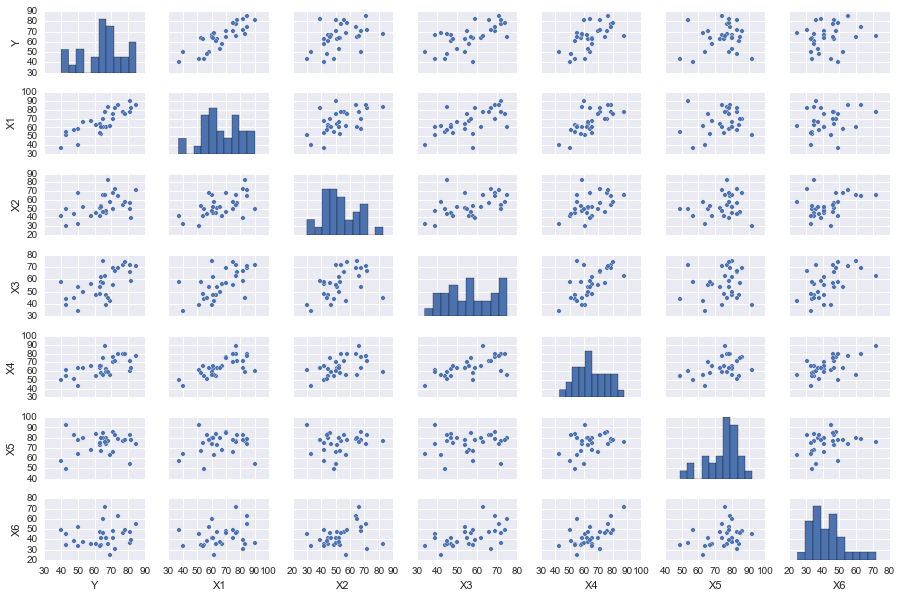

In [5]:
sns.pairplot(x, size = 1.2, aspect=1.5)

Next, we'll use the **<code>ols</code>** function from the **<code>statsmodels.formula.api</code> (<code>smf</code>)** package we imported earlier to create fit the data. Remember, **<code>ols</code>** refers to the **least squared residuals** mentioned earlier.

In [7]:
lm = smf.ols('Y ~ X1 + X2 + X3 + X4 + X5 + X6', data=x)
fit = lm.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Sat, 23 May 2015   Prob (F-statistic):           1.24e-05
Time:                        14:08:47   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.7871     11.589      0.931      0.3

Pay attention to the <code>P>|t|</code> column; let's see what happens when we remove the feature with the highest value (<code>X5</code>).

In [8]:
fit2 = smf.ols('Y ~ X1 + X2 + X3 + X4 + X6', data=x).fit()
print fit2.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     13.10
Date:                Sat, 23 May 2015   Prob (F-statistic):           3.28e-06
Time:                        14:12:20   Log-Likelihood:                -97.294
No. Observations:                  30   AIC:                             206.6
Df Residuals:                      24   BIC:                             215.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.7979      8.491      1.507      0.1

Note that when we remove <code>X5</code>, the adjusted [R<sup>2</sup>](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit) increases slightly. The adjusted R<sup>2</sup> will penalize you for adding independent variables that do not fit the model. Note that the bias is decreased, and the variance is increased.

In [9]:
fit4 = smf.ols('Y ~ X1 + X3 + X6', data=x).fit()
print fit4.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     22.92
Date:                Sat, 23 May 2015   Prob (F-statistic):           1.81e-07
Time:                        14:17:08   Log-Likelihood:                -97.638
No. Observations:                  30   AIC:                             203.3
Df Residuals:                      26   BIC:                             208.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.5777      7.544      1.800      0.0

In the version above, we removed <code>X2</code> and <code>X4</code> as well, since they had high <code>P>|t|</code> values, and as a result, we've reached a model with the best adjusted R<sup>2</sup> value, and thus the best fit so far.

Let's remove <code>X6</code> in the next iteration (since it has the highest <code>P>|t|</code> value left) and see what happens.

In [10]:
fit5 = smf.ols('Y ~ X1 + X3', data=x).fit()
print fit5.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     32.74
Date:                Sat, 23 May 2015   Prob (F-statistic):           6.06e-08
Time:                        14:19:47   Log-Likelihood:                -98.569
No. Observations:                  30   AIC:                             203.1
Df Residuals:                      27   BIC:                             207.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.8709      7.061      1.398      0.1

It looks like this version of the model is weaker, and thus the previous one is likely the best to use.

###Polynomial Regression

**Polynomial regression** models, like the one below, appear to not be like linear regression models, but upon closer observation, are more like linear regression models than we think.
$$y = \alpha + \beta_1 x + \beta_2 x^2 +...+ \beta_n(x^n) +\varepsilon$$

Polynomial regressions **are linear in relation to the beta values**. Polynomial regression is considered a special case of multiple linear regression!

The problem with polynomial regressions, however, is that the <code>x<sub>n</sub></code> values are **strongly multicollinear**, which means that the predictor values are highly correlated with each other. Sad panda.

To remedy this, we can replace the correlated predictors with uncorrelated predictors:

$$y = \alpha + \beta_1 f_1(x) + \beta_2 f_2(x^2) +...+ \beta_n f_n(x^n) + \varepsilon$$

In summary, [polynomial regression](http://en.wikipedia.org/wiki/Polynomial_regression) fits an <i>n</i>-th order polynomial to our data using least squares. [Linear regression](http://en.wikipedia.org/wiki/Linear_regression) is a special case of polynomial regression which fits a polynomial where degree <i>n</i> = 1.

To illustrate, let's create a polynomial graph, generate some random data points that adhere to said graph, and attempt to find a model that best fits the generated data (and thus the original graph):

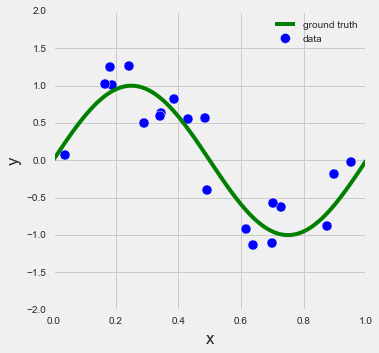

In [11]:
%matplotlib inline

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.cross_validation import train_test_split
import matplotlib.pylab as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from IPython.core.pylabtools import figsize
figsize(5,5)
plt.style.use('fivethirtyeight')

np.random.seed(9)

def f(x):
    return np.sin(2 * np.pi * x)

# generate points used to plot
x_plot = np.linspace(0, 1, 100)

# generate points and keep a subset of them
n_samples = 100
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

fig,ax = plt.subplots(1,1)
ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
ax.scatter(X_train, y_train, label='data', s=100)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

Now that we have our sample dataset, let's attempt to fit some models to it. We'll first try to fit a line to the data.

In [12]:
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X_train, y_train, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

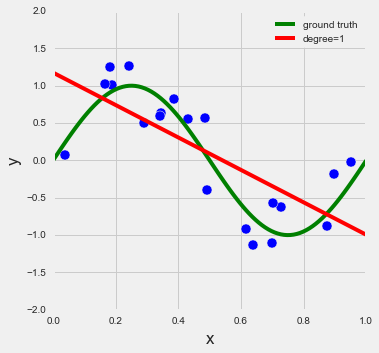

In [14]:
fig,ax = plt.subplots(1,1)
degree = 1
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
est.fit(X_train, y_train)
plot_approximation(est, ax, label='degree=%d' % degree)

Yeah, no. Let's try it with a function of degree 2.

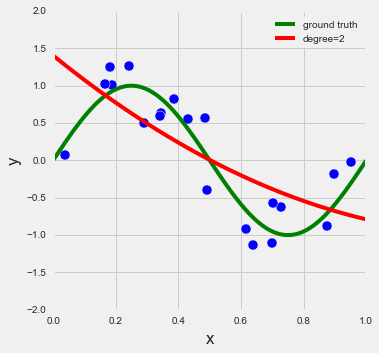

In [15]:
fig,ax = plt.subplots(1,1)
degree = 2
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
est.fit(X_train, y_train)
plot_approximation(est, ax, label='degree=%d' % degree)

Meh. Third time's a charm? Let's use degree 3.

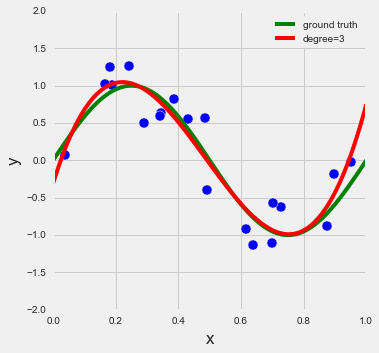

In [16]:
fig,ax = plt.subplots(1,1)
degree = 3
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
est.fit(X_train, y_train)
plot_approximation(est, ax, label='degree=%d' % degree)

Sick graph, bruh! What happens if we go degree-happy and use degree 9?

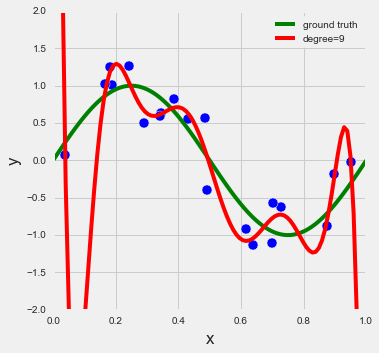

In [17]:
fig,ax = plt.subplots(1,1)
degree = 9
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
est.fit(X_train, y_train)
plot_approximation(est, ax, label='degree=%d' % degree)

Total over-compensating with the fit, dude. Looks like degree 3 is where it's at, at least visually.

How can we confirm which proposed model has the best fit? We can use the **<code>mean_squared_error</code>** function from the scikit-learn <code>metrics</code> package and plot the training and testing error of each degree to find out.

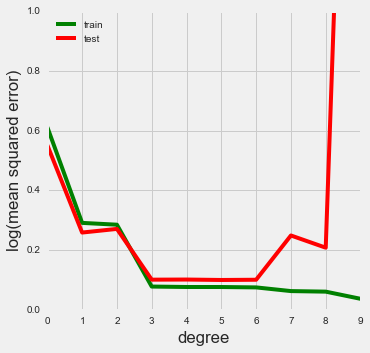

In [18]:
from sklearn.metrics import mean_squared_error

train_error = np.empty(10)
test_error = np.empty(10)
for degree in range(10):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

plt.plot(np.arange(10), train_error, color='green', label='train')
plt.plot(np.arange(10), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper left')

Looks like the **training data error decreases as we increase the degree**, but the **testing data error significantly increases past degree 6**. This makes sense since **the model becomes overfitted as degree increases with the testing data**.

Based on the graph above, **the best model will have a degree between three and six** to minimize training and testing error.

###Regularization

How do we measure the complexity of a model?

We can do so by defining the complexity as a function of the size of coefficients:

$\sum |\beta_i |$   **(L1-norm)** **or** $\sum \beta_i^2$    **(L2-norm)**

From the above, we can then use the following regularization techniques:

**L1 regularization:** $y = \sum \beta_i x_i + \varepsilon \ni \sum|\beta_i| < s$

**L2 regularization:** $y = \sum \beta_i x_i + \varepsilon \ni \sum\beta_i^2 < s$

[**Regularization**](http://en.wikipedia.org/wiki/Regularization_%28mathematics%29) is the method of preventing **overfitting** by explicitly controlling model complexity.

The above regularization problems are also expressed as:

**L1 regularization:** $min(||y - x \beta||^2 + \lambda||x||)$

**L2 regularization:** $min(||y - x \beta||^2 + \lambda||x||^2)$

The generalization error in our model can be decomposed into a bias component and variance component.

These versions reflect the fact that there is a cost associated with regularization between **bias** and **variance**, which is regulated by the **hyperparameter $\lambda$**.

As a result, we trade away some variance (precision) for a little bias (accuracy) in our model, which results in a better overall fit.

Let's look at some examples of L2 regularization to see how $\lambda$ affects model fit. Remember:

**L2 regularization:** $min(||y - x \beta||^2 + \lambda||x||^2)$

<img src="lambda_zero.png">
<img src="lambda_one.png">
<img src="lambda_ten.png">

Let's now take a look at two methods of regularization: Ridge Regression and LASSO.

####Ridge Regression

We would like a method that eliminates the need to manually select the degree of the polynomial: we can add a constraint to our linear regression model that constrains the magnitude of the coefficients in the regression model. This constraint is called the regularization term and the technique is often called shrinkage in the statistical community because it shrinks the coefficients towards zero. In the context of polynomial regression, constraining the magnitude of the regression coefficients effectively is a smoothness assumption: by constraining the L2 norm of the regression coefficients we express our preference for smooth functions rather than wiggly functions.

A popular regularized linear regression model is [Ridge Regression]((http://en.wikipedia.org/wiki/Tikhonov_regularization). This adds the L2 norm of the coefficients to the ordinary least squares objective:

  $J(\boldsymbol\beta) = \frac{1}{n}\sum_{i=0}^n (y_i - \boldsymbol\beta^T \mathbf{x}_i')^2 + \alpha \|\boldsymbol\beta\|_2$

where $\boldsymbol\beta$ is the vector of coefficients including the intercept term and $\mathbf{x}_i'$ is the i-th feature fector including a dummy feature for the intercept. The L2 norm term is weighted by a regularization parameter ``alpha``: if ``alpha=0`` then you recover the Ordinary Least Squares regression model. The larger the value of ``alpha`` the higher the smoothness constraint.

Below you can see the approximation of a [``sklearn.linear_model.Ridge``](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) estimator fitting a polynomial of degree nine for various values of ``alpha`` (left) and the corresponding coefficient loadings (right). The smaller the value of ``alpha`` the higher the magnitude of the coefficients, so the functions we can model can be more and more wiggly. 

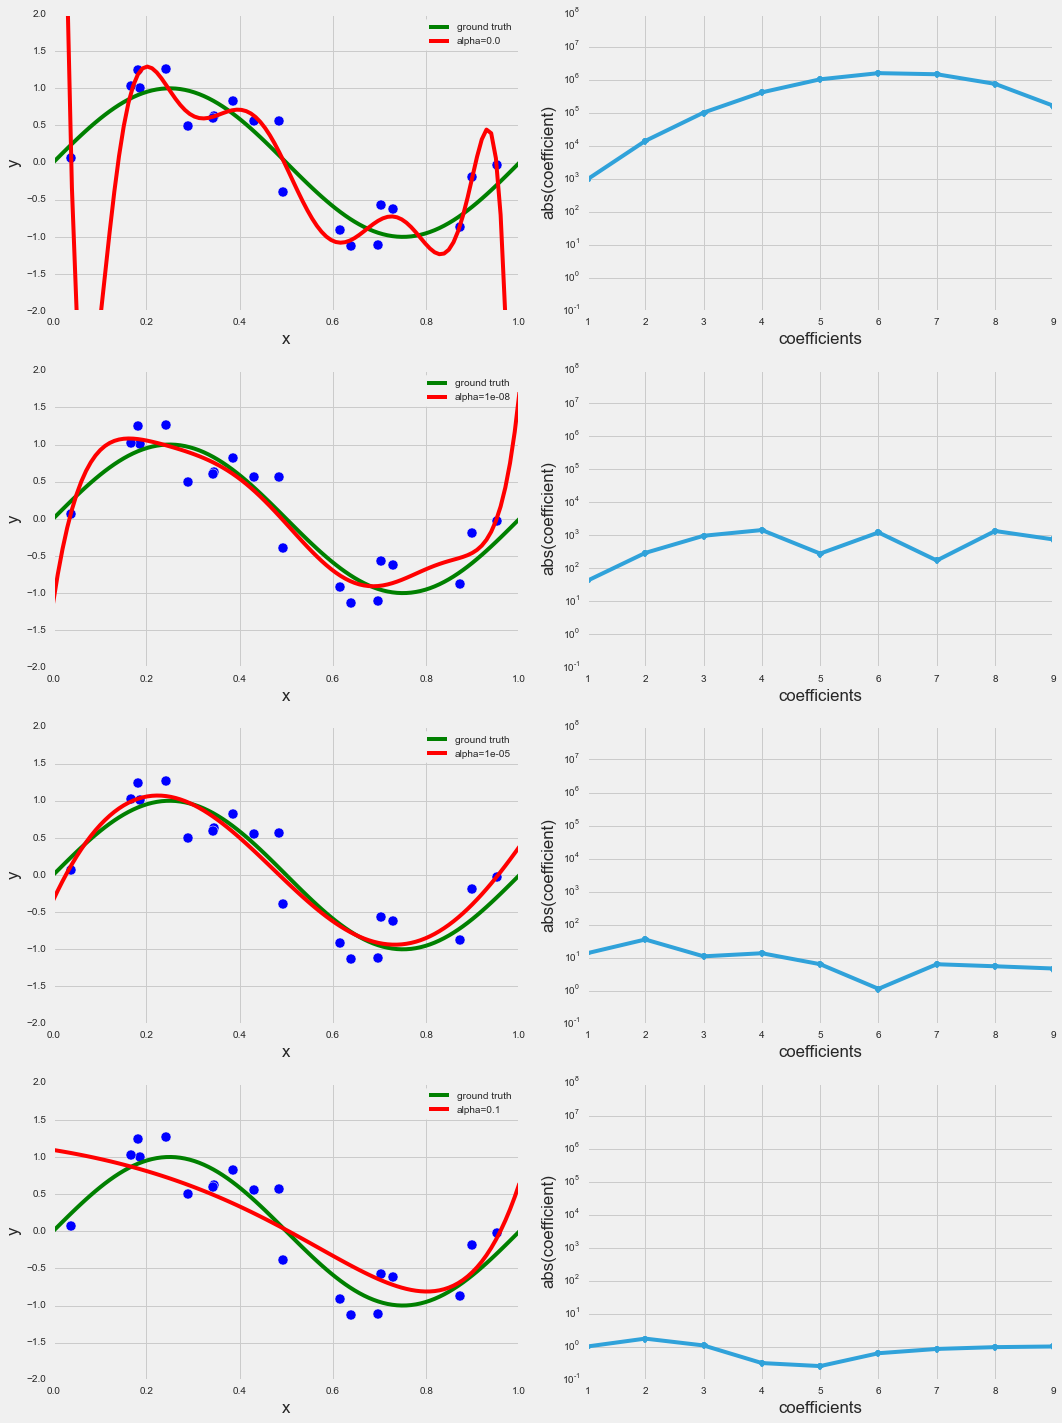

In [19]:
fig, ax_rows = plt.subplots(4, 2, figsize=(15, 20))

def plot_coefficients(est, ax, label=None, yscale='log'):
    coef = est.steps[-1][1].coef_.ravel()
    if yscale == 'log':
        ax.semilogy(np.abs(coef), marker='o', label=label)
        ax.set_ylim((1e-1, 1e8))
    else:
        ax.plot(np.abs(coef), marker='o', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((1, 9))

degree = 9
alphas = [0.0, 1e-8, 1e-5, 1e-1]
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    est.fit(X_train, y_train)
    plot_approximation(est, ax_left, label='alpha=%r' % alpha)
    plot_coefficients(est, ax_right, label='Ridge(alpha=%r) coefficients' % alpha)

plt.tight_layout()

####LASSO

Another popular regularization technique is the [LASSO](http://en.wikipedia.org/wiki/Least_squares#Lasso_method), a technique which puts an [L1 norm](http://mathworld.wolfram.com/L1-Norm.html) penalty instead. The difference between the two is that the LASSO leads to sparse solutions, driving most coefficients to zero, whereas Ridge Regression leads to dense solutions, in which most coefficients are non-zero.

/Users/Jay/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:490: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


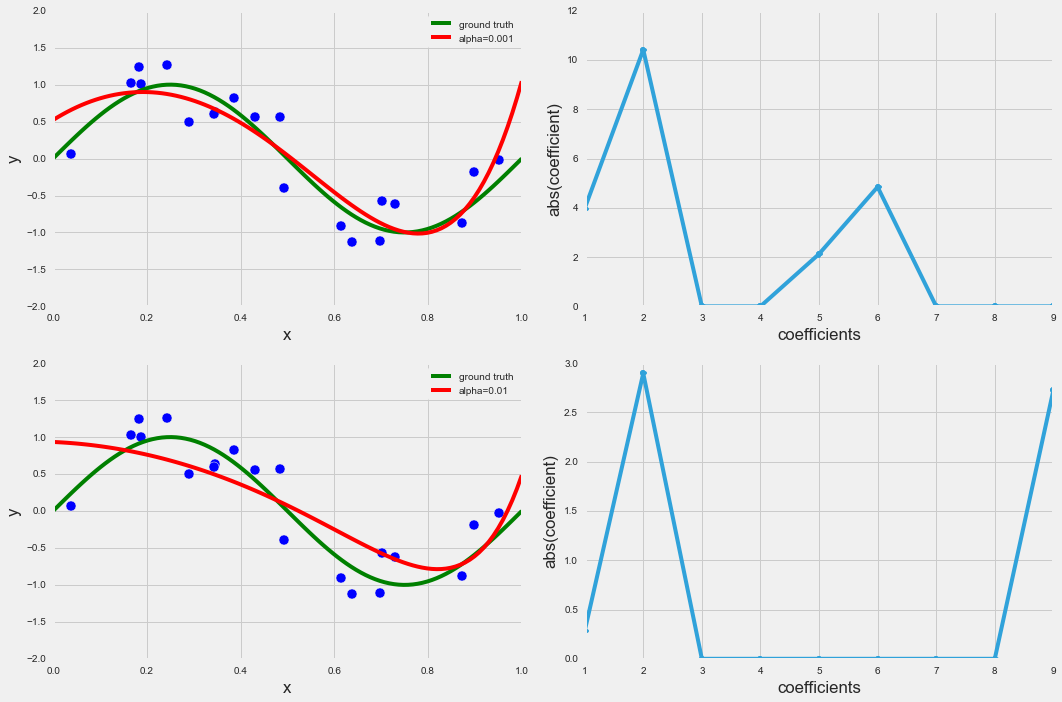

In [20]:
from sklearn.linear_model import Lasso

fig, ax_rows = plt.subplots(2, 2, figsize=(15, 10))

degree = 9
alphas = [1e-3, 1e-2]
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
    est.fit(X_train, y_train)
    plot_approximation(est, ax_left, label='alpha=%r' % alpha)
    plot_coefficients(est, ax_right, label='Lasso(alpha=%r) coefficients' % alpha, yscale=None)

plt.tight_layout()